# 2. Deploy CNN Model to Predict Brown Dwarf Atmospheric Parameters 


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DeepBuilder import *
from TelescopeML.Predictor import *
from TelescopeML.StatVisAnalyzer import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN

/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/


Loading BokehJS ...

Loading BokehJS ...

/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/


## 2.1 Data Preperation 

### 2.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 2.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 2.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 2.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 2.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
build_regressor_CNN = BuildRegressorCNN( 
                             trained_model = None,
                             trained_model_history = None,
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 2.2.2 Split the dataset into train, validate and test sets

In [12]:
build_regressor_CNN.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=42,)

### 2.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
build_regressor_CNN.standardize_X_row_wise()

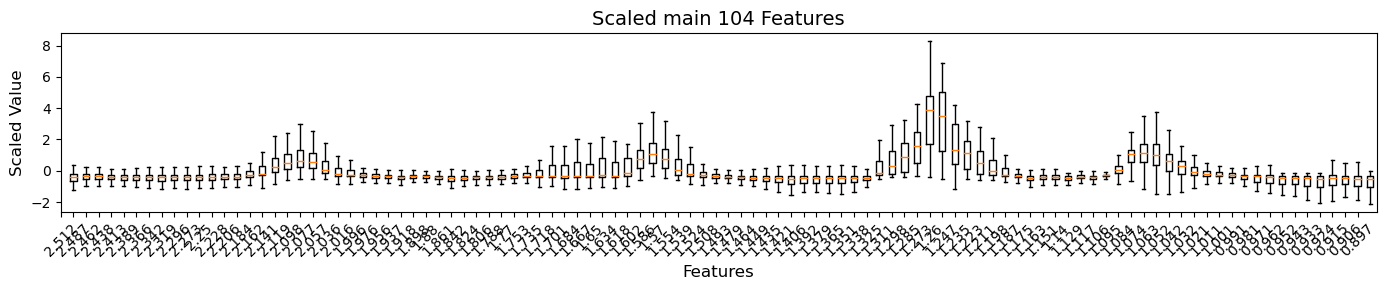

In [14]:
build_regressor_CNN.plot_boxplot_scaled_features(scaled_feature= build_regressor_CNN.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 2.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
build_regressor_CNN.standardize_y_column_wise()

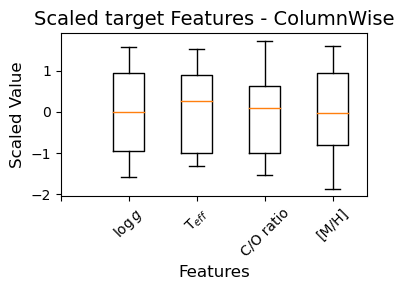

In [16]:
build_regressor_CNN.plot_boxplot_scaled_features(scaled_feature= build_regressor_CNN.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 2.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
build_regressor_CNN.X_train_min = build_regressor_CNN.X_train.min(axis=1)
build_regressor_CNN.X_train_max = build_regressor_CNN.X_train.max(axis=1)

# validation
build_regressor_CNN.X_val_min = build_regressor_CNN.X_val.min(axis=1)
build_regressor_CNN.X_val_max = build_regressor_CNN.X_val.max(axis=1)

# test
build_regressor_CNN.X_test_min = build_regressor_CNN.X_test.min(axis=1)
build_regressor_CNN.X_test_max = build_regressor_CNN.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((build_regressor_CNN.X_train_min, build_regressor_CNN.X_train_max)).T
df_MinMax_val = pd.DataFrame((build_regressor_CNN.X_val_min, build_regressor_CNN.X_val_max)).T
df_MinMax_test = pd.DataFrame((build_regressor_CNN.X_test_min, build_regressor_CNN.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)
df_MinMax_val.rename(columns={0:'min', 1:'max'}, inplace=True)
df_MinMax_test.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,8.265340e-12,3.445259e-08
1,8.080712e-22,8.397132e-14
2,2.734403e-07,8.632182e-06
3,4.414951e-16,3.373262e-10
4,3.722576e-07,6.859888e-06


### 2.2.6 Scale Min Max features - ColumnWise

In [21]:
build_regressor_CNN.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

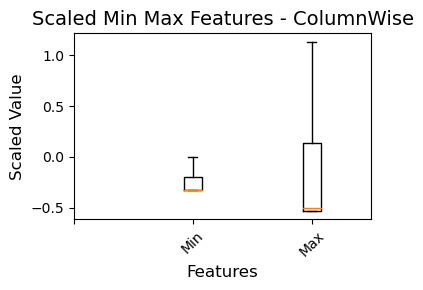

In [22]:
build_regressor_CNN.plot_boxplot_scaled_features(scaled_feature= build_regressor_CNN.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 2.3 Load the Trained CNN model and check the performance

We will perform the following tasks in the follow:

1. Load the trained CNN model
2. Plot the archeticture of the trained ML model
3. Check the model summary 
4. Check the Loss function from the training history
5. Plot the regression reports to evaluate the trained model performace using R$^2$ 

### 2.3.1 Load the trained CNN model

- Load the trained CNN model, which includes:
    - The model parameters to apply it to a given datasets 
    - The training history to check the performance 

In [23]:
loaded_model, history = load_or_dump_trained_model_CNN(indicator='Toy_parameters_v4_1000epoch_v2',
                                                      load_or_dump = 'load')

2023-11-08 22:10:04.053097: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
build_regressor_CNN.trained_model = loaded_model
build_regressor_CNN.trained_model_history = history

### 2.3.2 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

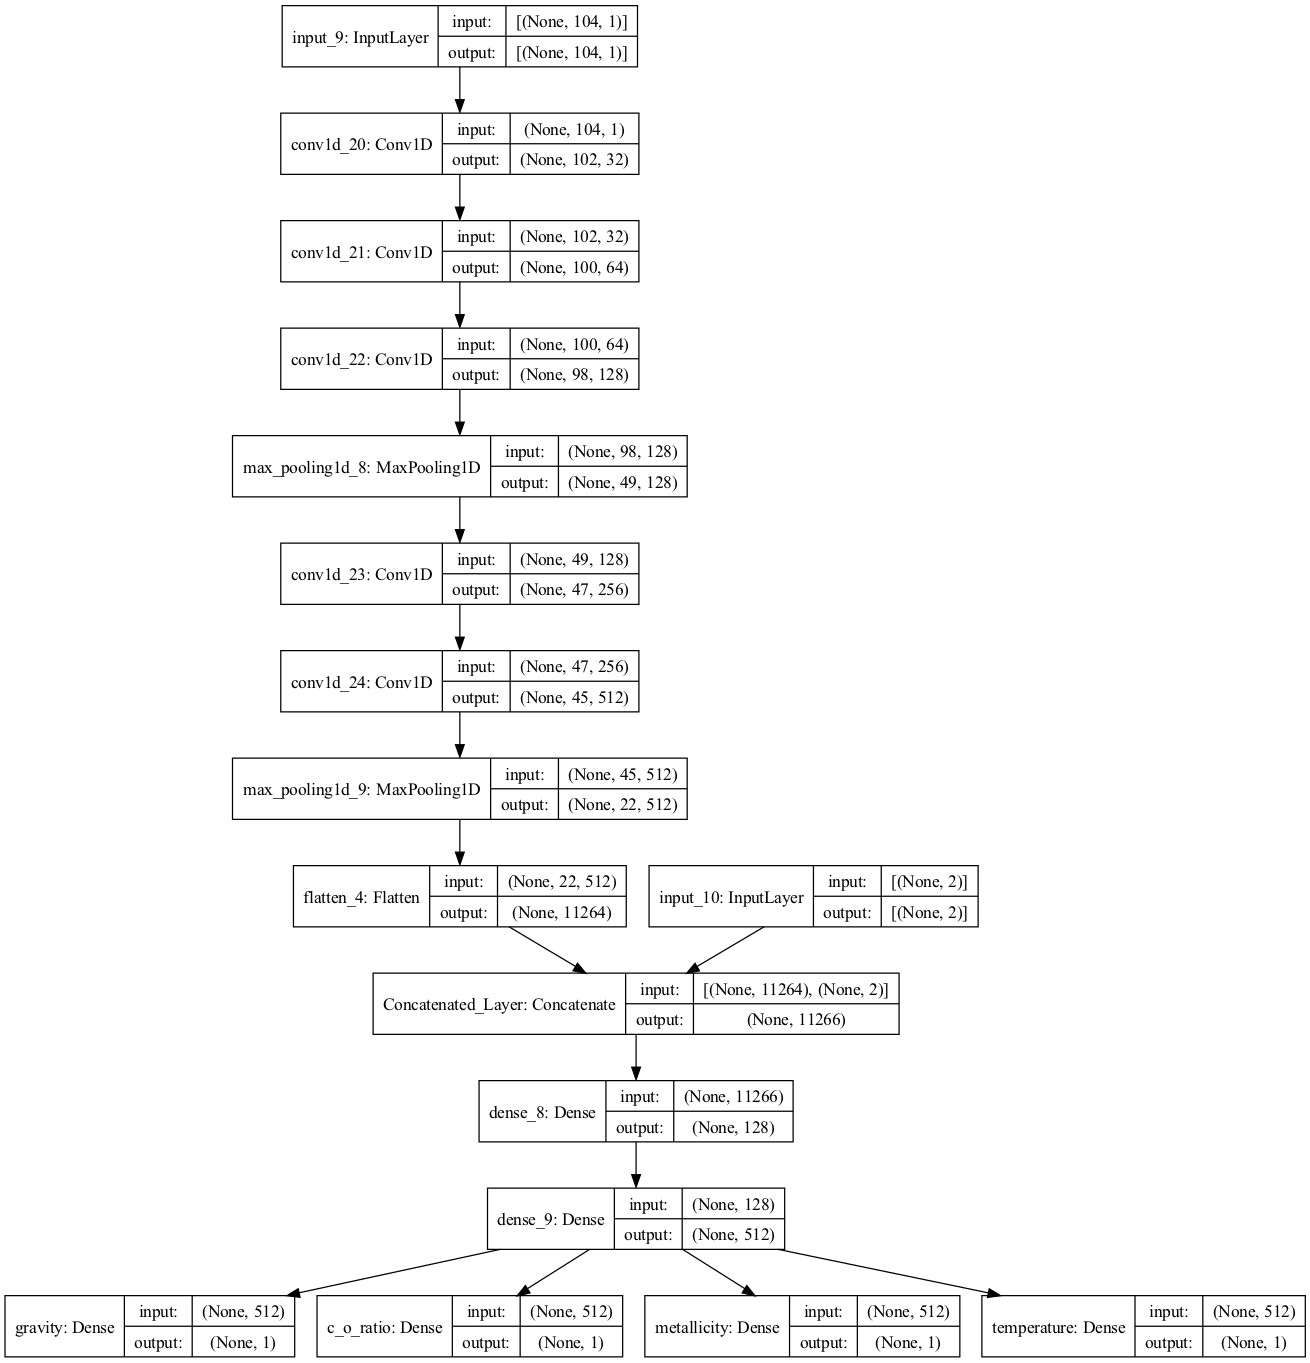

In [25]:
# model architecture
tf.keras.utils.plot_model(
                build_regressor_CNN.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

Trained Model summary

In [26]:
build_regressor_CNN.trained_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 104, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 102, 32)      128         input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, 100, 64)      6208        conv1d_20[0][0]                  
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 98, 128)      24704       conv1d_21[0][0]                  
____________________________________________________________________________________________

### 2.3.3 Check the training history through *Loss* metric

In [27]:
build_regressor_CNN.plot_model_loss(history=history, 
                                    title = 'X:StandRow, y:StandCol - MinMax:StandardalizedCol, TunedCNNmodel')

### 2.3.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets


2023-11-08 22:10:04.615569: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


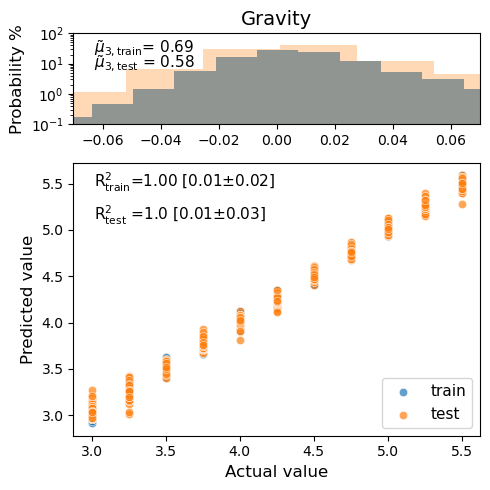

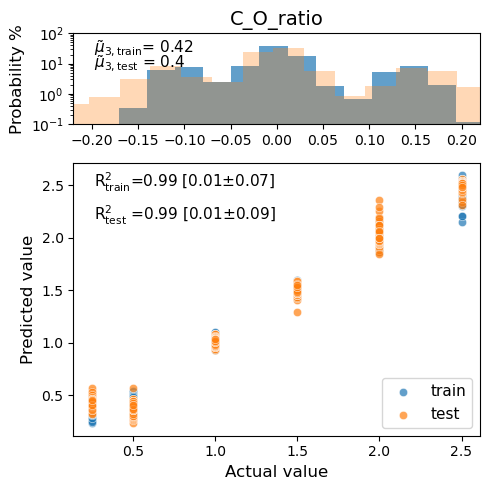

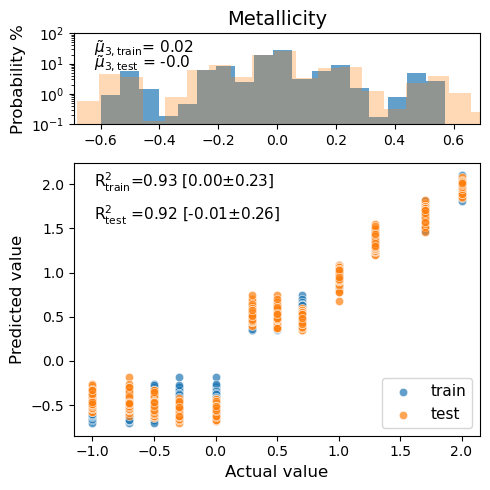

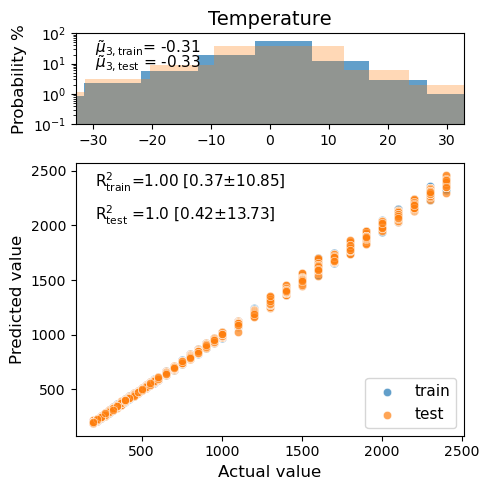

In [28]:
i = 1
regression_report(
        trained_model = build_regressor_CNN,
    
        Xtrain = [build_regressor_CNN.X_train_standardized_rowwise[::i],
                  build_regressor_CNN.X_train_standardized_columnwise[::i]],
    
        Xtest  = [build_regressor_CNN.X_test_standardized_rowwise[::i], 
                  build_regressor_CNN.X_test_standardized_columnwise[::i]],
    
        ytrain = build_regressor_CNN.y_train_standardized_columnwise[::i],
    
        ytest  = build_regressor_CNN.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
        __print_results__ = False,        
                 )

## 2.4 Predict Brown Dwarf Atmosphric Parameters of HD 3651 B

In the following, we will deploy the trained CNN models to predict atmospheric parameters. Major steps are: 

1. Define the literature reported data for the object 

2. Instintiate *ObsParameterPredictor* class from *Predictor* module

3. Load the observational Telescope data
    - Replace negative Flam with zero
    - Take the average of neibougrs for Flam_error <= 0
    - Plot_observational_spectra_errorbar_
    
    
4. Process the observational Telescope data
    - Instintiate ProcessObservationalDataset class
    - Define feature_names_synthetic and feature_names_obs



### 2.4.1 Load the data and process

Define the literature data reported for this object

This data will be used later to: 
- Compare the Literature vs ML predicted results
- Convert the unit of the real observational dataset or fluxes from $F_\lambda$ to $F_\nu$ and $F_\nu^{absolute}$
- Revised the object radius

In [29]:
HD3651B_BD_literature_info = {
          'bd_name':'HD3651B',
          'bd_Teff':818,
          'bd_logg':3.94,
          'bd_met': -0.22, 
          'bd_distance_pc' : 11.134, 
          'bd_radius_Rjup' : .81,
          'bd_radius_Rjup_tuned': .81} #0.81

brown_dwarf_literature_info = HD3651B_BD_literature_info

<font size="4"> Instintiate the *ObserveParameterPredictor* class from *Predictor* module </font>

*ObserveParameterPredictor* class performs the following tasks:
- Load the observational datasets
- Process the data including converting their units
- Visualize the data

In [30]:
# brown_dwarf_literature_info 
predict = ObserveParameterPredictor(object_name = brown_dwarf_literature_info['bd_name'], #Ross458C, HD3651B, GJ570D
                                training_dataset_df = train_BD,
                                wl_synthetic = wl_synthetic, 
                                BuildRegressorCNN_class = build_regressor_CNN,
                                bd_literature_dic = brown_dwarf_literature_info
                                )

<font size="4">  Load the observational Telescope data </font>


In [31]:
predict.load_observational_spectra(
    __plot_observational_spectra_errorbar__=True,
    __replace_zeros_negatives_with_mean__=True,
    __print_results__=True,
    )

------- Observational DataFrame Example ---------
         wl      F_lambda  F_lambda_error  F_lambda_obs  F_lambda_obs_err
0  0.650857  8.606238e-17    4.358173e-17  8.606238e-17      4.358173e-17
1  0.653073  1.771977e-17    3.360256e-17  1.771977e-17      3.360256e-17
2  0.655278  7.300979e-17    3.132892e-17  7.300979e-17      3.132892e-17
3  0.657472  2.569511e-17    2.837585e-17  2.569511e-17      2.837585e-17
4  0.659659  3.786160e-18    2.497690e-17  3.786160e-18      2.497690e-17


Loading BokehJS ...

### 2.4.2 Process the observational Telescope data

In [32]:
predict.Process_Observational_Dataset(
    __print_results__=True,
    F_lambda_obs=None,
    F_lambda_obs_err=None    )

------------  Interpolated Observational Spectra: Absolute F𝜈 ------------
          0.897         0.906         0.915         0.924         0.933  \
0  5.997174e-09  8.576299e-09  6.022747e-09  1.077888e-08  9.085077e-09   

          0.943         0.952         0.962         0.971         0.981  ...  \
0  1.302502e-08  1.262613e-08  1.206215e-08  1.860160e-08  2.463705e-08  ...   

          2.296         2.319         2.342         2.366         2.389  \
0  7.905764e-09  6.980955e-09  6.795411e-09  4.822663e-09  7.304593e-09   

          2.413         2.438         2.462         2.487         2.512  
0  1.166870e-08  8.334444e-09  1.709369e-08  1.834442e-08  2.162885e-08  

[1 rows x 104 columns]
------------ df_MinMax Single Observational Spectrum ------------
              0             1
0  1.059763e-09  3.096774e-07
******************************

Radius, BD_mean, BD_std:

{   'BD_mean': 5.6044032080948946e-08,
    'BD_std': 6.905598259831068e-08,
    'bd_radius_Rjup': 0.81}
**

In [33]:
predict.obs_data_df.columns

Index(['wl', 'F_lambda', 'F_lambda_error', 'F_lambda_obs', 'F_lambda_obs_err',
       'Fnu_obs', 'Fnu_obs_err', 'Fnu_obs_absolute', 'Fnu_obs_absolute_err'],
      dtype='object')

<font size="4">  Check the processed Telescope dataset </font>

This dataframe includes the following columns:

- **wl (wavelengths in $\mu m$)**: Wavelengths from the observational dataset.

- **F_lambda ($F_\lambda$)**: Original observational spectral density flux along the wavelength axis.
- **F_lambda_error ($F_\lambda^{error}$)**: Original observational spectral density flux uncertainty along the wavelength axis.
- **F_lambda_obs ($F_\lambda^{obs}$)**: Same as the original F_lambda but with a more descriptive label.
- **F_lambda_obs_err ($F_\lambda^{error, obs}$)**: Same as the original F_lambda_error but with a more descriptive label.
- **Fnu_obs ($F_\nu^{obs}$)**: Observational spectral density flux along the frequency axis (converted from the F_lambda column).
- **Fnu_obs_err ($F_\nu^{error}$)**: Observational spectral density flux uncertainty along the frequency axis (converted from the  F_lambda column).
- **Fnu_obs_absolute ($F_\nu^{obs, abs}$)**: Observational absolute spectral density flux along the frequency axis (converted from the F_lambda column).
- **Fnu_obs_absolute_err ($F_\nu^{obs, abs, error}$)**: Observational absolute spectral density flux uncertainty along the frequency axis (converted from the F_lambda column).



In [34]:
predict.obs_data_df.head(6)

,wl,F_lambda,F_lambda_error,F_lambda_obs,F_lambda_obs_err,Fnu_obs,Fnu_obs_err,Fnu_obs_absolute,Fnu_obs_absolute_err
0,0.650857,8.606238e-17,4.358173e-17,8.606238e-17,4.358173e-17,1.216085e-27,6.158216e-28,4.280381e-08,2.167572e-08
1,0.653073,1.771977e-17,3.360256e-17,1.771977e-17,3.360256e-17,2.520930e-28,4.780520e-28,8.873182e-09,1.682650e-08
2,0.655278,7.300979e-17,3.132892e-17,7.300979e-17,3.132892e-17,1.045711e-27,4.487205e-28,3.680698e-08,1.579409e-08
3,0.657472,2.569511e-17,2.837585e-17,2.569511e-17,2.837585e-17,3.704967e-28,4.091501e-28,1.304076e-08,1.440129e-08
4,0.659659,3.786160e-18,2.497690e-17,3.786160e-18,2.497690e-17,5.495628e-29,3.625408e-28,1.934354e-09,1.276073e-08
5,0.661837,1.798661e-17,2.475434e-17,1.798661e-17,2.475434e-17,2.628032e-28,3.616868e-28,9.250161e-09,1.273067e-08


### 2.4.3 Deploy the Trained ML Models for Prediction: 

<font size="4"> *predict_from_random_spectra* function from *Predictor* class to perform the following tasks: </font>
    
- Generate random spectra based on the observational data

- Deploy the trained ML models to predict the target outputs: 
    - gravity ( log$g$ )
    - temperature ( T$_{eff}$ )
    - carbon-to-oxygen ratio ( C/O )
    - metallicity ( [M/H] )

- Print the results, including:
    - Predicted Targets from Randomly Generated Spectra.
    - Print a summary of descriptive statistics, including the mean, standard deviation, and the shape of a dataset's distribution (percentiles).

- Visualize the results to gain insights about:
    - *Histograms* representing the distribution of the predicted target outputs by the trained ML models.
    - *Boxplots* displaying the first quartile, median, third quartile, and maximum. In a box plot, the box is drawn from the first quartile to the third quartile. A vertical black line goes through the box at the median, and a vertical white line goes through the box to indicate the mean.


******************************

Predicted Targets from Randomly Generated Spectra:

{   'c_o_ratio': 1.3245530128479004,
    'gravity': 4.9847612380981445,
    'metallicity': -0.357530415058136,
    'temperature': 813.6578979492188}
******************************

            logg        c_o        met           T
count  30.000000  30.000000  30.000000   30.000000
mean    4.984761   1.324553  -0.357530  813.657898
std     0.161557   0.219789   0.091979   31.113300
min     4.687432   0.962410  -0.474289  733.286560
25%     4.859629   1.170476  -0.426509  797.011948
50%     5.027677   1.318703  -0.390268  819.634277
75%     5.106550   1.400032  -0.304616  830.310257
max     5.280931   1.809793  -0.149282  878.553101


<Figure size 640x480 with 0 Axes>

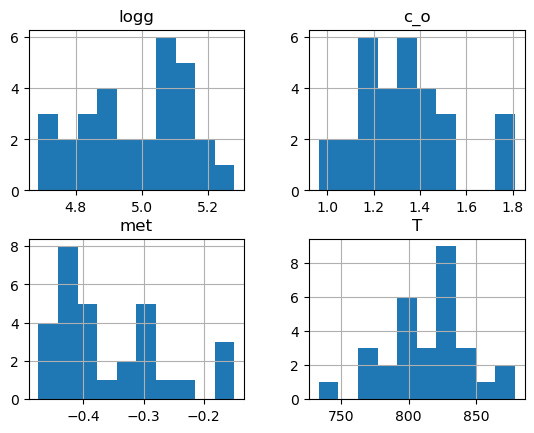

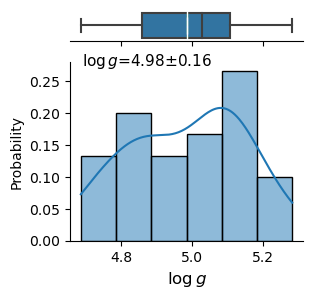

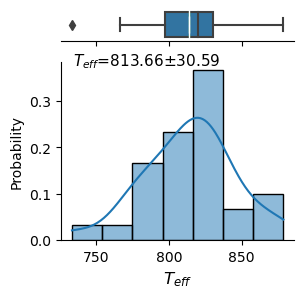

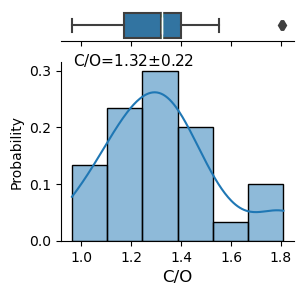

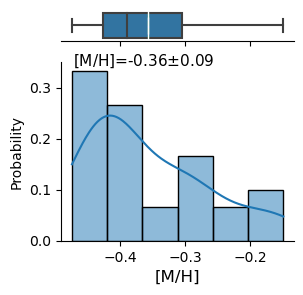

Radius = 0.81 R_Jup:  𝛘2 = 116.64, p-value = 1.69e-01


In [35]:
predict.predict_from_random_spectra(random_spectra_num= 30,
                                     __print_results__= True,
                                     __plot_randomly_generated_spectra__= True,
                                     __plot_histogram__= True,
                                     __plot_boxplot_hist__= True,
                                     __plot_pred_vs_obs_errorbar__= True,
                                     __plot_pred_vs_obs_errorbar_stat__ = True,
                                     __calculate_confidence_intervals_std_df__ = True,
                                    )

### 2.4.4 Tune the Radius

What is the 𝛘2 value for the predicted ML vs. the observational spectra?

In [36]:
chi_square_test(x_obs = predict.obs_data_df['wl'], 
                y_obs = predict.obs_data_df['Fnu_obs_absolute'], 
                yerr_obs = predict.obs_data_df['Fnu_obs_absolute_err'],
                
                x_pre = predict.confidence_intervals_std_df['wl'].values[::-1], 
                y_pre = predict.confidence_intervals_std_df['mean'], 
                yerr_pre = predict.confidence_intervals_std_df['std_values'],
                radius = brown_dwarf_literature_info['bd_radius_Rjup'],
                __plot_results__ = False,
                __print_results__ = True)

Radius = 0.81 R_Jup:  𝛘2 = 116.64, p-value = 1.69e-01


(116.64, '1.69e-01')

 What is the 𝛘2 value (and p-value) for a range of $R_{Jup}$ radius? 

In [37]:
def tune_radius(Rmin = brown_dwarf_literature_info['bd_radius_Rjup']-0.1, 
                Rmax = brown_dwarf_literature_info['bd_radius_Rjup']+0.1, 
                dR=0.01,
                brown_dwarf_literature_info = None,
                __plot_results__ = False,
               __print_results__ = False,
               __plot_stat_results__ = False):
    
    R_list = []
    chi_square_list = []
    p_value_list = []
    random_pred_mean_list = []
 

    for radius in list( np.linspace(Rmin, Rmax, num=int((Rmax-Rmin)/dR) )):
        
        brown_dwarf_literature_info['bd_radius_Rjup_tuned'] = radius
        
        # brown_dwarf_literature_info = Ross458C_BD_literature_info
        predict = ObserveParameterPredictor(object_name = brown_dwarf_literature_info['bd_name'], #Ross458C, HD3651B, GJ570D
                                        training_dataset_df = train_BD,
                                        wl_synthetic = wl_synthetic, 
                                        BuildRegressorCNN_class = build_regressor_CNN,
                                        bd_literature_dic = brown_dwarf_literature_info
                                        )

        predict.load_observational_spectra(
            __plot_observational_spectra_errorbar__=False,
            __replace_zeros_negatives_with_mean__=True,
            __print_results__=False,
            )
        
        predict.Process_Observational_Dataset(
            __print_results__=False,
            F_lambda_obs=None,
            F_lambda_obs_err=None    
                )

        predict.predict_from_random_spectra(random_spectra_num= 3,
                                             __print_results__= False,
                                             __plot_randomly_generated_spectra__= False,
                                             __plot_histogram__= False,
                                             __plot_boxplot_hist__= False,
                                             __plot_pred_vs_obs_errorbar__= False,
                                             __plot_pred_vs_obs_errorbar_stat__ = False,
                                             __calculate_confidence_intervals_std_df__ = True,
                                            )

        chi_square, p_value =  chi_square_test(x_obs = predict.obs_data_df['wl'], 
                                y_obs = predict.obs_data_df['Fnu_obs_absolute'], 
                                yerr_obs = predict.obs_data_df['Fnu_obs_absolute_err'],

                                x_pre = predict.confidence_intervals_std_df['wl'].values[::-1], 
                                y_pre = predict.confidence_intervals_std_df['mean'], 
                                yerr_pre = predict.confidence_intervals_std_df['std_values'],
                                radius = brown_dwarf_literature_info['bd_radius_Rjup'],
                                __plot_results__ = False,
                                __print_results__ = False)
        
        
        if chi_square >= 0.:

            R_list.append(radius)
            chi_square_list.append(chi_square)
            p_value_list.append(np.float64(p_value))
            random_pred_mean_list.append(list( predict.dic_random_pred_mean.values() ))
        else:
            pass

        if __print_results__:
            print( f"Radius = {'{:.2f}'.format(radius)} R_Jup:  𝛘2 = {chi_square}, p-value = {p_value}")
            
#     if __plot_stat_results__:
#         plot_chi_square_p_value(R_list, chi_square_list, p_value_list)
    
    tuned_ML_R_param_df = pd.DataFrame(columns=['radius','chi_square','p_value','gravity','temperature','c_o_ratio','metallicity'])
    tuned_ML_R_param_df['radius'] = R_list
    tuned_ML_R_param_df['chi_square'] = chi_square_list
    tuned_ML_R_param_df['p_value'] = p_value_list
    tuned_ML_R_param_df['gravity'] = np.array(random_pred_mean_list).T[0]
    tuned_ML_R_param_df['c_o_ratio'] = np.array(random_pred_mean_list).T[1]
    tuned_ML_R_param_df['metallicity'] = np.array(random_pred_mean_list).T[2]
    tuned_ML_R_param_df['temperature'] = np.array(random_pred_mean_list).T[3]

    return tuned_ML_R_param_df

In [38]:
print_results_fun(brown_dwarf_literature_info, print_title= 'HD3651B: Literature reported Info')

******************************

HD3651B: Literature reported Info

{   'bd_Teff': 818,
    'bd_distance_pc': 11.134,
    'bd_logg': 3.94,
    'bd_met': -0.22,
    'bd_name': 'HD3651B',
    'bd_radius_Rjup': 0.81,
    'bd_radius_Rjup_tuned': 0.81}
******************************



In [39]:
tuned_ML_R_param_df = tune_radius(Rmin = brown_dwarf_literature_info['bd_radius_Rjup']- 0.2, 
                        Rmax = brown_dwarf_literature_info['bd_radius_Rjup']+ 0.2, 
                        dR = 0.01,
                        brown_dwarf_literature_info = brown_dwarf_literature_info,
                        __plot_results__=False,
                        __print_results__=False,
                        __plot_stat_results__=False,)

In [40]:
tuned_ML_R_param_df.describe()

,radius,chi_square,p_value,gravity,temperature,c_o_ratio,metallicity
count,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000
mean,0.810000,195.310513,4.471507e-01,5.038057,809.439508,1.385660,-0.359680
std,0.120018,225.493677,4.719229e-01,0.091411,24.927286,0.130929,0.050006
min,0.610000,24.780000,0.000000e+00,4.823747,758.522461,1.117008,-0.428504
25%,0.710000,55.965000,1.008500e-09,4.981836,794.845245,1.304531,-0.394908
50%,0.810000,119.970000,1.210000e-01,5.057795,808.429993,1.377496,-0.375953
75%,0.910000,213.775000,1.000000e+00,5.103873,822.757874,1.461327,-0.334866
max,1.010000,1207.060000,1.000000e+00,5.204460,873.189270,1.646371,-0.235602


In [41]:
tuned_ML_R_param_df.head()

,radius,chi_square,p_value,gravity,temperature,c_o_ratio,metallicity
0,0.610000,176.17,9.620000e-06,5.109649,804.941589,1.379943,-0.306632
1,0.620526,560.50,0.000000e+00,5.147484,873.189270,1.365183,-0.235602
2,0.631053,45.13,1.000000e+00,5.019325,804.345520,1.434373,-0.329731
3,0.641579,156.77,5.080000e-04,5.051071,781.326172,1.429677,-0.389112
4,0.652105,207.08,5.540000e-09,4.961850,816.635254,1.355566,-0.329860


In [42]:

datuned_ML_R_param_df_filtered = tuned_ML_R_param_df[tuned_ML_R_param_df['p_value'].between(.04, 1.)]

plot_scatter_x_y(   x = datuned_ML_R_param_df_filtered['radius'],
                    y = datuned_ML_R_param_df_filtered['chi_square'],
                    plot_title='Scatter Plot',
                    x_label='Radius (RJupiter)',
                    y_label='𝛘2 value',
                    plot_width=800,
                    plot_height=300,)

---

## 2.5 Predict Brown Dwarf Atmosphric Parameters of Ross 458C 

In the following, we will deploy the trained CNN models to predict atmospheric parameters. Major steps are: 

1. Define the literature reported data for the object 

2. Instintiate *ObsParameterPredictor* class from *Predictor* module

3. Load the observational Telescope data
    - Replace negative Flam with zero
    - Take the average of neibougrs for Flam_error <= 0
    - Plot_observational_spectra_errorbar_
    
    
4. Process the observational Telescope data
    - Instintiate ProcessObservationalDataset class
    - Define feature_names_synthetic and feature_names_obs



### 2.5.1 Load the data and process

Define the literature data reported for this object

This data will be used later to: 
- Compare the Literature vs ML predicted results
- Convert the unit of the real observational dataset or fluxes from $F_\lambda$ to $F_\nu$ and $F_\nu^{absolute}$
- Revised the object radius

In [43]:
Ross458C_BD_literature_info = {'bd_name':'Ross458C',
          'bd_Teff':804,
          'bd_logg':4.09,
          'bd_met': 0.23, 
          'bd_distance_pc' : 11.509, 
          'bd_radius_Rjup' :  0.68,
          'bd_radius_Rjup_tuned': None } #1.0 * 0.68 

brown_dwarf_literature_info = Ross458C_BD_literature_info

<font size="4"> Instintiate the *ObserveParameterPredictor* class from *Predictor* module </font>

*ObserveParameterPredictor* class performs the following tasks:
- Load the observational datasets
- Process the data including converting their units
- Visualize the data

In [44]:
# brown_dwarf_literature_info 
predict = ObserveParameterPredictor(object_name = brown_dwarf_literature_info['bd_name'], #Ross458C, HD3651B, GJ570D
                                training_dataset_df = train_BD,
                                wl_synthetic = wl_synthetic, 
                                BuildRegressorCNN_class = build_regressor_CNN,
                                bd_literature_dic = brown_dwarf_literature_info
                                )

<font size="4">  Load the observational Telescope data </font>


In [45]:
predict.load_observational_spectra(
    __plot_observational_spectra_errorbar__=True,
    __replace_zeros_negatives_with_mean__=True,
    __print_results__=True,
    )

------- Observational DataFrame Example ---------
         wl      F_lambda  F_lambda_error  F_lambda_obs  F_lambda_obs_err
0  0.692196  1.896532e-18    3.679267e-18  1.896532e-18      3.679267e-18
1  0.693680 -8.169787e-18    3.527262e-18  1.025778e-18      3.527262e-18
2  0.695165  1.550241e-19    3.538419e-18  1.550241e-19      3.538419e-18
3  0.696652  2.584982e-18    3.294942e-18  2.584982e-18      3.294942e-18
4  0.698140  2.829340e-18    3.251767e-18  2.829340e-18      3.251767e-18


Loading BokehJS ...

### 2.5.2 Process the observational Telescope data

In [46]:
predict.Process_Observational_Dataset(
    __print_results__=True,
    F_lambda_obs=None,
    F_lambda_obs_err=None    )

------------  Interpolated Observational Spectra: Absolute F𝜈 ------------
          0.897         0.906         0.915         0.924         0.933  \
0  7.431980e-09  6.772274e-09  7.564100e-09  9.779585e-09  6.589324e-09   

          0.943         0.952         0.962         0.971         0.981  ...  \
0  1.186165e-08  1.168911e-08  1.217457e-08  1.491817e-08  1.867662e-08  ...   

          2.296         2.319         2.342         2.366         2.389  \
0  1.675178e-08  2.010950e-08  7.911809e-09  1.281873e-08  1.298326e-08   

          2.413         2.438         2.462         2.487         2.512  
0  2.857164e-08  4.066384e-08  4.169449e-08  1.412377e-07  1.428379e-07  

[1 rows x 104 columns]
------------ df_MinMax Single Observational Spectrum ------------
              0             1
0  2.687596e-09  2.890186e-07
******************************

Radius, BD_mean, BD_std:

{   'BD_mean': 6.724862374473837e-08,
    'BD_std': 7.044146438046857e-08,
    'bd_radius_Rjup': 0.68}
***

<font size="4">  Check the processed Telescope dataset </font>

This dataframe includes the following columns:

- **wl (wavelengths in $\mu m$)**: Wavelengths from the observational dataset.

- **F_lambda ($F_\lambda$)**: Original observational spectral density flux along the wavelength axis.
- **F_lambda_error ($F_\lambda^{error}$)**: Original observational spectral density flux uncertainty along the wavelength axis.
- **F_lambda_obs ($F_\lambda^{obs}$)**: Same as the original F_lambda but with a more descriptive label.
- **F_lambda_obs_err ($F_\lambda^{error, obs}$)**: Same as the original F_lambda_error but with a more descriptive label.
- **Fnu_obs ($F_\nu^{obs}$)**: Observational spectral density flux along the frequency axis (converted from the F_lambda column).
- **Fnu_obs_err ($F_\nu^{error}$)**: Observational spectral density flux uncertainty along the frequency axis (converted from the  F_lambda column).
- **Fnu_obs_absolute ($F_\nu^{obs, abs}$)**: Observational absolute spectral density flux along the frequency axis (converted from the F_lambda column).
- **Fnu_obs_absolute_err ($F_\nu^{obs, abs, error}$)**: Observational absolute spectral density flux uncertainty along the frequency axis (converted from the F_lambda column).


In [47]:
predict.obs_data_df

,wl,F_lambda,F_lambda_error,F_lambda_obs,F_lambda_obs_err,Fnu_obs,Fnu_obs_err,Fnu_obs_absolute,Fnu_obs_absolute_err
0,0.692196,1.896532e-18,3.679267e-18,1.896532e-18,3.679267e-18,3.031078e-29,5.880282e-29,1.617486e-09,3.137919e-09
1,0.693680,-8.169787e-18,3.527262e-18,1.025778e-18,3.527262e-18,1.646459e-29,5.661549e-29,8.786066e-10,3.021195e-09
2,0.695165,1.550241e-19,3.538419e-18,1.550241e-19,3.538419e-18,2.498932e-30,5.703804e-29,1.333515e-10,3.043744e-09
3,0.696652,2.584982e-18,3.294942e-18,2.584982e-18,3.294942e-18,4.184739e-29,5.334067e-29,2.233119e-09,2.846440e-09
4,0.698140,2.829340e-18,3.251767e-18,2.829340e-18,3.251767e-18,4.599908e-29,5.286686e-29,2.454668e-09,2.821156e-09
...,...,...,...,...,...,...,...,...,...
804,2.535954,-2.561479e-17,6.676713e-17,4.611883e-17,6.676713e-17,9.893281e-27,1.432269e-26,5.279392e-07,7.643078e-07
805,2.537791,4.631278e-17,5.670232e-17,4.631278e-17,5.670232e-17,9.949287e-27,1.218125e-26,5.309279e-07,6.500331e-07
806,2.539632,4.883466e-17,4.699071e-17,4.883466e-17,4.699071e-17,1.050628e-26,1.010957e-26,5.606509e-07,5.394813e-07
807,2.541476,-1.191826e-16,4.816838e-16,1.981941e-16,4.816838e-16,4.270140e-26,1.037799e-25,2.278692e-06,5.538051e-06


### 2.5.3 Deploy the Trained ML Models for Prediction: 

<font size="4"> *predict_from_random_spectra* function from *Predictor* class to perform the following tasks: </font>
    
- Generate random spectra based on the observational data

- Deploy the trained ML models to predict the target outputs: 
    - gravity ( log$g$ )
    - temperature ( T$_{eff}$ )
    - carbon-to-oxygen ratio ( C/O )
    - metallicity ( [M/H] )

- Print the results, including:
    - Predicted Targets from Randomly Generated Spectra.
    - Print a summary of descriptive statistics, including the mean, standard deviation, and the shape of a dataset's distribution (percentiles).

- Visualize the results to gain insights about:
    - *Histograms* representing the distribution of the predicted target outputs by the trained ML models.
    - *Boxplots* displaying the first quartile, median, third quartile, and maximum. In a box plot, the box is drawn from the first quartile to the third quartile. A vertical black line goes through the box at the median, and a vertical white line goes through the box to indicate the mean.


******************************

Predicted Targets from Randomly Generated Spectra:

{   'c_o_ratio': 1.1712424755096436,
    'gravity': 4.700616836547852,
    'metallicity': 0.8281871676445007,
    'temperature': 948.648193359375}
******************************

            logg        c_o        met            T
count  30.000000  30.000000  30.000000    30.000000
mean    4.700617   1.171242   0.828187   948.648193
std     0.197305   0.156228   0.125226    51.159481
min     4.302224   1.000711   0.566551   844.629089
25%     4.527849   1.093129   0.766678   918.694244
50%     4.718648   1.146545   0.833667   952.103455
75%     4.840750   1.201187   0.873513   975.464050
max     5.077786   1.744199   1.286931  1075.872803


<Figure size 640x480 with 0 Axes>

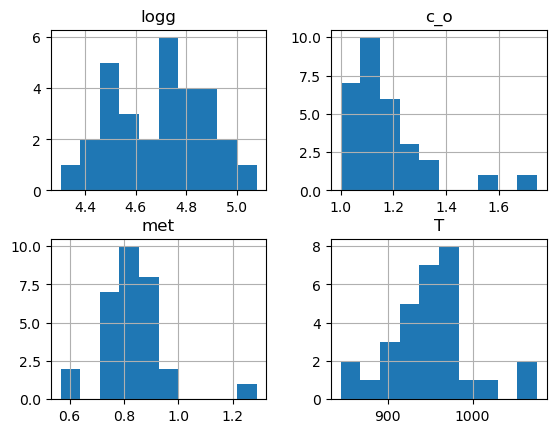

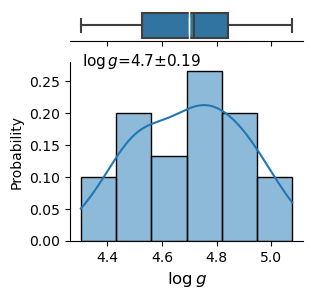

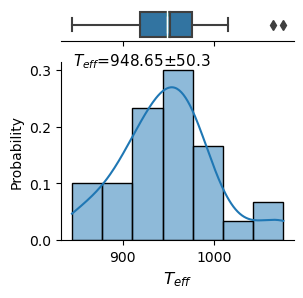

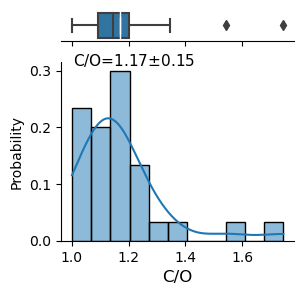

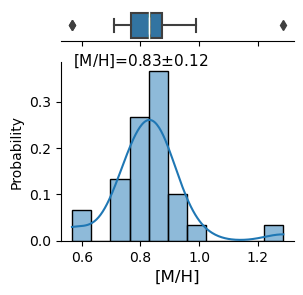

Radius = 0.68 R_Jup:  𝛘2 = 102.02, p-value = 5.09e-01


In [48]:
predict.predict_from_random_spectra(random_spectra_num= 30,
                                     __print_results__= True,
                                     __plot_randomly_generated_spectra__= True,
                                     __plot_histogram__= True,
                                     __plot_boxplot_hist__= True,
                                     __plot_pred_vs_obs_errorbar__= True,
                                     __plot_pred_vs_obs_errorbar_stat__ = True,
                                     __calculate_confidence_intervals_std_df__ = True,
                                    )

Comennet from natasha: >2.2 mincron - Is not missing any thing!
> 1 sigma error 
> training set
> trusing the posterior space 

### 2.5.4 Tune the Radius

 What is the 𝛘2 value for the predicted ML vs. the observational spectra?

In [49]:
chi_square_test(x_obs = predict.obs_data_df['wl'], 
                y_obs = predict.obs_data_df['Fnu_obs_absolute'], 
                yerr_obs = predict.obs_data_df['Fnu_obs_absolute_err'],
                
                x_pre = predict.confidence_intervals_std_df['wl'].values[::-1], 
                y_pre = predict.confidence_intervals_std_df['mean'], 
                yerr_pre = predict.confidence_intervals_std_df['std_values'],
                radius = brown_dwarf_literature_info['bd_radius_Rjup'],
                __plot_results__ = False,
                __print_results__ = True)

Radius = 0.68 R_Jup:  𝛘2 = 102.02, p-value = 5.09e-01


(102.02, '5.09e-01')

 What is the 𝛘2 value (and p-value) for a range of $R_{Jup}$ radius?

In [50]:
def tune_radius(Rmin = brown_dwarf_literature_info['bd_radius_Rjup']-0.1, 
                Rmax = brown_dwarf_literature_info['bd_radius_Rjup']+0.1, 
                dR=0.01,
                brown_dwarf_literature_info = None,
                __plot_results__ = False,
               __print_results__ = False,
               __plot_stat_results__ = False):
    
    R_list = []
    chi_square_list = []
    p_value_list = []
    random_pred_mean_list = []
 

    for radius in list( np.linspace(Rmin, Rmax, num=int((Rmax-Rmin)/dR) )):
        
        brown_dwarf_literature_info['bd_radius_Rjup_tuned'] = radius
        
        # brown_dwarf_literature_info = Ross458C_BD_literature_info
        predict = ObserveParameterPredictor(object_name = brown_dwarf_literature_info['bd_name'], #Ross458C, HD3651B, GJ570D
                                        training_dataset_df = train_BD,
                                        wl_synthetic = wl_synthetic, 
                                        BuildRegressorCNN_class = build_regressor_CNN,
                                        bd_literature_dic = brown_dwarf_literature_info
                                        )

        predict.load_observational_spectra(
            __plot_observational_spectra_errorbar__=False,
            __replace_zeros_negatives_with_mean__=True,
            __print_results__=False,
            )
        
        predict.Process_Observational_Dataset(
            __print_results__=False,
            F_lambda_obs=None,
            F_lambda_obs_err=None    
                )

        predict.predict_from_random_spectra(random_spectra_num= 3,
                                             __print_results__= False,
                                             __plot_randomly_generated_spectra__= False,
                                             __plot_histogram__= False,
                                             __plot_boxplot_hist__= False,
                                             __plot_pred_vs_obs_errorbar__= False,
                                             __plot_pred_vs_obs_errorbar_stat__ = False,
                                             __calculate_confidence_intervals_std_df__ = True,
                                            )

        chi_square, p_value =  chi_square_test(x_obs = predict.obs_data_df['wl'], 
                                y_obs = predict.obs_data_df['Fnu_obs_absolute'], 
                                yerr_obs = predict.obs_data_df['Fnu_obs_absolute_err'],

                                x_pre = predict.confidence_intervals_std_df['wl'].values[::-1], 
                                y_pre = predict.confidence_intervals_std_df['mean'], 
                                yerr_pre = predict.confidence_intervals_std_df['std_values'],
                                radius = brown_dwarf_literature_info['bd_radius_Rjup'],
                                __plot_results__ = False,
                                __print_results__ = False)
        
        
        if chi_square >= 0.:

            R_list.append(radius)
            chi_square_list.append(chi_square)
            p_value_list.append(np.float64(p_value))
            random_pred_mean_list.append(list( predict.dic_random_pred_mean.values() ))
        else:
            pass

        if __print_results__:
            print( f"Radius = {'{:.2f}'.format(radius)} R_Jup:  𝛘2 = {chi_square}, p-value = {p_value}")
            
#     if __plot_stat_results__:
#         plot_chi_square_p_value(R_list, chi_square_list, p_value_list)
    
    tuned_ML_R_param_df = pd.DataFrame(columns=['radius','chi_square','p_value','gravity','temperature','c_o_ratio','metallicity'])
    tuned_ML_R_param_df['radius'] = R_list
    tuned_ML_R_param_df['chi_square'] = chi_square_list
    tuned_ML_R_param_df['p_value'] = p_value_list
    tuned_ML_R_param_df['gravity'] = np.array(random_pred_mean_list).T[0]
    tuned_ML_R_param_df['c_o_ratio'] = np.array(random_pred_mean_list).T[1]
    tuned_ML_R_param_df['metallicity'] = np.array(random_pred_mean_list).T[2]
    tuned_ML_R_param_df['temperature'] = np.array(random_pred_mean_list).T[3]

    return tuned_ML_R_param_df

In [51]:
print_results_fun(brown_dwarf_literature_info, print_title= 'Ross458C: Literature reported Info')

******************************

Ross458C: Literature reported Info

{   'bd_Teff': 804,
    'bd_distance_pc': 11.509,
    'bd_logg': 4.09,
    'bd_met': 0.23,
    'bd_name': 'Ross458C',
    'bd_radius_Rjup': 0.68,
    'bd_radius_Rjup_tuned': None}
******************************



In [52]:
tuned_ML_R_param_df = tune_radius(Rmin = brown_dwarf_literature_info['bd_radius_Rjup']- 0.2, 
                        Rmax = brown_dwarf_literature_info['bd_radius_Rjup']+ 0.2, 
                        dR = 0.01,
                        brown_dwarf_literature_info = brown_dwarf_literature_info,
                        __plot_results__=False,
                        __print_results__=False,
                        __plot_stat_results__=False,)

In [53]:
tuned_ML_R_param_df.describe()

,radius,chi_square,p_value,gravity,temperature,c_o_ratio,metallicity
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.680000,272.127000,0.235843,4.687078,949.343777,1.148305,0.830071
std,0.119902,290.027567,0.390869,0.106115,23.672934,0.087624,0.072492
min,0.480000,61.240000,0.000000,4.442431,914.556885,0.994420,0.677846
25%,0.580000,108.510000,0.000000,4.624072,930.756073,1.093554,0.778874
50%,0.680000,179.625000,0.000018,4.666683,943.248779,1.145284,0.821320
75%,0.780000,280.905000,0.353500,4.747775,963.980026,1.205198,0.872375
max,0.880000,1404.860000,1.000000,4.935681,1014.318176,1.324359,0.972004


In [54]:
tuned_ML_R_param_df.head()

,radius,chi_square,p_value,gravity,temperature,c_o_ratio,metallicity
0,0.480000,293.15,0.000000e+00,4.550918,934.464905,1.141581,0.677846
1,0.490256,189.22,4.800000e-07,4.626329,954.389587,1.109024,0.813642
2,0.500513,166.86,6.980000e-05,4.798691,926.518066,1.102576,0.837847
3,0.510769,92.39,7.640000e-01,4.632170,929.750549,1.010934,0.902224
4,0.521026,1311.32,0.000000e+00,4.442431,935.878906,1.037317,0.703664


In [55]:

datuned_ML_R_param_df_filtered = tuned_ML_R_param_df[tuned_ML_R_param_df['p_value'].between(.04, 1.)]

plot_scatter_x_y(   x = datuned_ML_R_param_df_filtered['radius'],
                    y = datuned_ML_R_param_df_filtered['chi_square'],
                    plot_title='Scatter Plot',
                    x_label='Radius (RJupiter)',
                    y_label='𝛘2 value',
                    plot_width=800,
                    plot_height=300,)

---

## 2.6 Predict Brown Dwarf Atmosphric Parameters of GJ 570D

In the following, we will deploy the trained CNN models to predict atmospheric parameters. Major steps are: 

1. Define the literature reported data for the object 

2. Instintiate *ObsParameterPredictor* class from *Predictor* module

3. Load the observational Telescope data
    - Replace negative Flam with zero
    - Take the average of neibougrs for Flam_error <= 0
    - Plot_observational_spectra_errorbar_
    
    
4. Process the observational Telescope data
    - Instintiate ProcessObservationalDataset class
    - Define feature_names_synthetic and feature_names_obs




### 2.6.1 Load the data and process

Define the literature data reported for this object

This data will be used later to: 
- Compare the Literature vs ML predicted results
- Convert the unit of the real observational dataset or fluxes from $F_\lambda$ to $F_\nu$ and $F_\nu^{absolute}$
- Revised the object radius

In [56]:
GJ570D_BD_literature_info = {'bd_name':'GJ570D',
          'bd_Teff':828,
          'bd_logg':3.90,
          'bd_met': -0.33, 
          'bd_distance_pc' : 5.884, 
          'bd_radius_Rjup' : 0.79,
          'bd_radius_Rjup_tuned': None } # 0.79

brown_dwarf_literature_info = GJ570D_BD_literature_info

<font size="4"> Instintiate the *ObserveParameterPredictor* class from *Predictor* module </font>

*ObserveParameterPredictor* class performs the following tasks:
- Load the observational datasets
- Process the data including converting their units
- Visualize the data

In [57]:
# brown_dwarf_literature_info 
predict = ObserveParameterPredictor(object_name = brown_dwarf_literature_info['bd_name'], #Ross458C, HD3651B, GJ570D
                                training_dataset_df = train_BD,
                                wl_synthetic = wl_synthetic, 
                                BuildRegressorCNN_class = build_regressor_CNN,
                                bd_literature_dic = brown_dwarf_literature_info
                                )

<font size="4">  Load the observational Telescope data </font>


In [58]:
predict.load_observational_spectra(
    __plot_observational_spectra_errorbar__=True,
    __replace_zeros_negatives_with_mean__=True,
    __print_results__=True,
    )

------- Observational DataFrame Example ---------
         wl      F_lambda  F_lambda_error  F_lambda_obs  F_lambda_obs_err
0  0.657971  4.569383e-17    7.119990e-17  4.569383e-17      7.119990e-17
1  0.660155 -2.299240e-17    0.000000e+00  4.581152e-17      7.541037e-17
2  0.662332 -4.419588e-17    0.000000e+00  4.592921e-17      7.962084e-17
3  0.664501 -9.488424e-18    0.000000e+00  4.604690e-17      8.383131e-17
4  0.666665  4.616459e-17    8.804178e-17  4.616459e-17      8.804178e-17


Loading BokehJS ...

### 2.6.2 Process the observational Telescope data

In [59]:
predict.Process_Observational_Dataset(
    __print_results__=True,
    F_lambda_obs=None,
    F_lambda_obs_err=None    )

------------  Interpolated Observational Spectra: Absolute F𝜈 ------------
          0.897         0.906         0.915         0.924         0.933  \
0  7.280711e-09  8.611113e-09  1.062637e-08  1.170489e-08  7.329417e-09   

          0.943         0.952         0.962         0.971         0.981  ...  \
0  1.371097e-08  1.299396e-08  1.443783e-08  1.943760e-08  2.911763e-08  ...   

          2.296         2.319         2.342         2.366         2.389  \
0  7.612835e-09  6.693866e-09  8.187037e-09  8.760881e-09  8.572828e-09   

          2.413         2.438         2.462         2.487         2.512  
0  1.231363e-08  1.863393e-08  1.684466e-08  2.206102e-08  1.915624e-08  

[1 rows x 104 columns]
------------ df_MinMax Single Observational Spectrum ------------
              0             1
0  1.670937e-09  3.343356e-07
******************************

Radius, BD_mean, BD_std:

{   'BD_mean': 5.960877683707767e-08,
    'BD_std': 7.325304103971966e-08,
    'bd_radius_Rjup': 0.79}
***

<font size="4">  Check the processed Telescope dataset </font>

This dataframe includes the following columns:

- **wl (wavelengths in $\mu m$)**: Wavelengths from the observational dataset.

- **F_lambda ($F_\lambda$)**: Original observational spectral density flux along the wavelength axis.
- **F_lambda_error ($F_\lambda^{error}$)**: Original observational spectral density flux uncertainty along the wavelength axis.
- **F_lambda_obs ($F_\lambda^{obs}$)**: Same as the original F_lambda but with a more descriptive label.
- **F_lambda_obs_err ($F_\lambda^{error, obs}$)**: Same as the original F_lambda_error but with a more descriptive label.
- **Fnu_obs ($F_\nu^{obs}$)**: Observational spectral density flux along the frequency axis (converted from the F_lambda column).
- **Fnu_obs_err ($F_\nu^{error}$)**: Observational spectral density flux uncertainty along the frequency axis (converted from the  F_lambda column).
- **Fnu_obs_absolute ($F_\nu^{obs, abs}$)**: Observational absolute spectral density flux along the frequency axis (converted from the F_lambda column).
- **Fnu_obs_absolute_err ($F_\nu^{obs, abs, error}$)**: Observational absolute spectral density flux uncertainty along the frequency axis (converted from the F_lambda column).


In [60]:
predict.obs_data_df.head(6)

,wl,F_lambda,F_lambda_error,F_lambda_obs,F_lambda_obs_err,Fnu_obs,Fnu_obs_err,Fnu_obs_absolute,Fnu_obs_absolute_err
0,0.657971,4.569383e-17,7.119990e-17,4.569383e-17,7.119990e-17,6.598578e-28,1.028187e-27,6.819110e-09,1.062550e-08
1,0.660155,-2.299240e-17,0.000000e+00,4.581152e-17,7.541037e-17,6.659565e-28,1.096231e-27,6.882135e-09,1.132869e-08
2,0.662332,-4.419588e-17,0.000000e+00,4.592921e-17,7.962084e-17,6.720781e-28,1.165085e-27,6.945398e-09,1.204023e-08
3,0.664501,-9.488424e-18,0.000000e+00,4.604690e-17,8.383131e-17,6.782206e-28,1.234744e-27,7.008875e-09,1.276010e-08
4,0.666665,4.616459e-17,8.804178e-17,4.616459e-17,8.804178e-17,6.843899e-28,1.305219e-27,7.072630e-09,1.348841e-08
5,0.668824,-4.426288e-17,0.000000e+00,4.311795e-17,6.684875e-17,6.433704e-28,9.974619e-28,6.648725e-09,1.030798e-08


### 2.6.3 Deploy the Trained ML Models for Prediction: 

<font size="4"> *predict_from_random_spectra* function from *Predictor* class to perform the following tasks: </font>
    
- Generate random spectra based on the observational data

- Deploy the trained ML models to predict the target outputs: 
    - gravity ( log$g$ )
    - temperature ( T$_{eff}$ )
    - carbon-to-oxygen ratio ( C/O )
    - metallicity ( [M/H] )

- Print the results, including:
    - Predicted Targets from Randomly Generated Spectra.
    - Print a summary of descriptive statistics, including the mean, standard deviation, and the shape of a dataset's distribution (percentiles).

- Visualize the results to gain insights about:
    - *Histograms* representing the distribution of the predicted target outputs by the trained ML models.
    - *Boxplots* displaying the first quartile, median, third quartile, and maximum. In a box plot, the box is drawn from the first quartile to the third quartile. A vertical black line goes through the box at the median, and a vertical white line goes through the box to indicate the mean.


******************************

Predicted Targets from Randomly Generated Spectra:

{   'c_o_ratio': 1.6189724206924438,
    'gravity': 5.200714588165283,
    'metallicity': -0.38963407278060913,
    'temperature': 870.3076171875}
******************************

            logg        c_o        met           T
count  30.000000  30.000000  30.000000   30.000000
mean    5.200715   1.618972  -0.389634  870.307617
std     0.160704   0.308051   0.042393   38.245594
min     4.909708   1.194863  -0.470097  770.424255
25%     5.055498   1.387216  -0.415297  849.381622
50%     5.194517   1.572525  -0.384998  881.194244
75%     5.308145   1.742798  -0.353687  899.016403
max     5.476437   2.417317  -0.312329  933.769897


<Figure size 640x480 with 0 Axes>

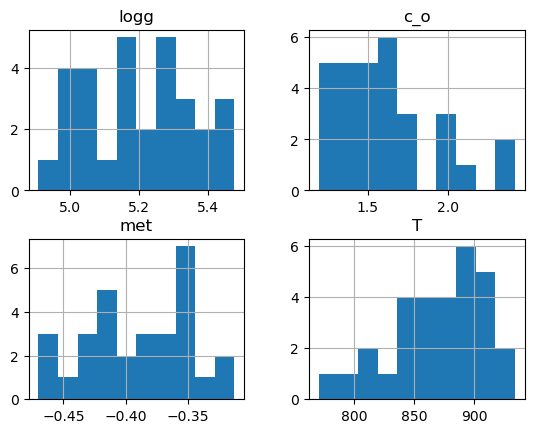

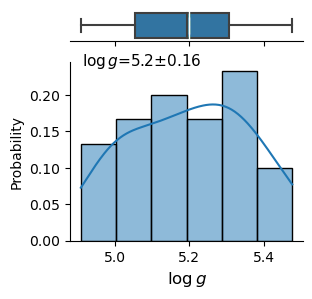

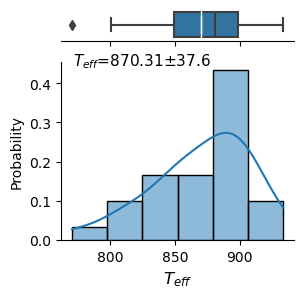

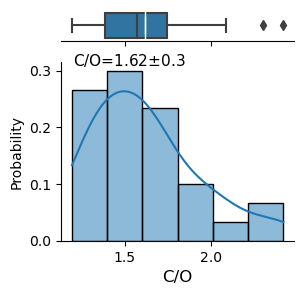

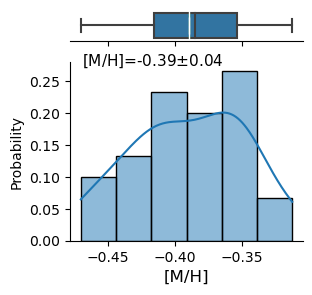

Radius = 0.79 R_Jup:  𝛘2 = 254.76, p-value = 7.33e-15


In [61]:
predict.predict_from_random_spectra(random_spectra_num= 30,
                                     __print_results__= True,
                                     __plot_randomly_generated_spectra__= True,
                                     __plot_histogram__= True,
                                     __plot_boxplot_hist__= True,
                                     __plot_pred_vs_obs_errorbar__= True,
                                     __plot_pred_vs_obs_errorbar_stat__ = True,
                                     __calculate_confidence_intervals_std_df__ = True,
                                    )

Comennet from natasha: >2.2 mincron - Is not missing any thing!
> 1 sigma error 
> training set
> trusing the posterior space 

### 2.6.4 Tune the Radius

 What is the 𝛘2 value for the predicted ML vs. the observational spectra?

In [62]:
chi_square_test(x_obs = predict.obs_data_df['wl'], 
                y_obs = predict.obs_data_df['Fnu_obs_absolute'], 
                yerr_obs = predict.obs_data_df['Fnu_obs_absolute_err'],
                
                x_pre = predict.confidence_intervals_std_df['wl'].values[::-1], 
                y_pre = predict.confidence_intervals_std_df['mean'], 
                yerr_pre = predict.confidence_intervals_std_df['std_values'],
                radius = brown_dwarf_literature_info['bd_radius_Rjup'],
                __plot_results__ = False,
                __print_results__ = True)

Radius = 0.79 R_Jup:  𝛘2 = 254.76, p-value = 7.33e-15


(254.76, '7.33e-15')

 What is the 𝛘2 value (and p-value) for a range of $R_{Jup}$ radius?

In [63]:
def tune_radius(Rmin = brown_dwarf_literature_info['bd_radius_Rjup']-0.1, 
                Rmax = brown_dwarf_literature_info['bd_radius_Rjup']+0.1, 
                dR=0.01,
                brown_dwarf_literature_info = None,
                __plot_results__ = False,
               __print_results__ = False,
               __plot_stat_results__ = False):
    
    R_list = []
    chi_square_list = []
    p_value_list = []
    random_pred_mean_list = []
 

    for radius in list( np.linspace(Rmin, Rmax, num=int((Rmax-Rmin)/dR) )):
        
        brown_dwarf_literature_info['bd_radius_Rjup_tuned'] = radius
        
        # brown_dwarf_literature_info = Ross458C_BD_literature_info
        predict = ObserveParameterPredictor(object_name = brown_dwarf_literature_info['bd_name'], #Ross458C, HD3651B, GJ570D
                                        training_dataset_df = train_BD,
                                        wl_synthetic = wl_synthetic, 
                                        BuildRegressorCNN_class = build_regressor_CNN,
                                        bd_literature_dic = brown_dwarf_literature_info
                                        )

        predict.load_observational_spectra(
            __plot_observational_spectra_errorbar__=False,
            __replace_zeros_negatives_with_mean__=True,
            __print_results__=False,
            )
        
        predict.Process_Observational_Dataset(
            __print_results__=False,
            F_lambda_obs=None,
            F_lambda_obs_err=None    
                )

        predict.predict_from_random_spectra(random_spectra_num= 3,
                                             __print_results__= False,
                                             __plot_randomly_generated_spectra__= False,
                                             __plot_histogram__= False,
                                             __plot_boxplot_hist__= False,
                                             __plot_pred_vs_obs_errorbar__= False,
                                             __plot_pred_vs_obs_errorbar_stat__ = False,
                                             __calculate_confidence_intervals_std_df__ = True,
                                            )

        chi_square, p_value =  chi_square_test(x_obs = predict.obs_data_df['wl'], 
                                y_obs = predict.obs_data_df['Fnu_obs_absolute'], 
                                yerr_obs = predict.obs_data_df['Fnu_obs_absolute_err'],

                                x_pre = predict.confidence_intervals_std_df['wl'].values[::-1], 
                                y_pre = predict.confidence_intervals_std_df['mean'], 
                                yerr_pre = predict.confidence_intervals_std_df['std_values'],
                                radius = brown_dwarf_literature_info['bd_radius_Rjup'],
                                __plot_results__ = False,
                                __print_results__ = False)
        
        
        if chi_square >= 0.:

            R_list.append(radius)
            chi_square_list.append(chi_square)
            p_value_list.append(np.float64(p_value))
            random_pred_mean_list.append(list( predict.dic_random_pred_mean.values() ))
        else:
            pass

        if __print_results__:
            print( f"Radius = {'{:.2f}'.format(radius)} R_Jup:  𝛘2 = {chi_square}, p-value = {p_value}")
            
#     if __plot_stat_results__:
#         plot_chi_square_p_value(R_list, chi_square_list, p_value_list)
    
    tuned_ML_R_param_df = pd.DataFrame(columns=['radius','chi_square','p_value','gravity','temperature','c_o_ratio','metallicity'])
    tuned_ML_R_param_df['radius'] = R_list
    tuned_ML_R_param_df['chi_square'] = chi_square_list
    tuned_ML_R_param_df['p_value'] = p_value_list
    tuned_ML_R_param_df['gravity'] = np.array(random_pred_mean_list).T[0]
    tuned_ML_R_param_df['c_o_ratio'] = np.array(random_pred_mean_list).T[1]
    tuned_ML_R_param_df['metallicity'] = np.array(random_pred_mean_list).T[2]
    tuned_ML_R_param_df['temperature'] = np.array(random_pred_mean_list).T[3]

    return tuned_ML_R_param_df

In [64]:
print_results_fun(brown_dwarf_literature_info, print_title= 'GJ570D: Literature reported Info')

******************************

GJ570D: Literature reported Info

{   'bd_Teff': 828,
    'bd_distance_pc': 5.884,
    'bd_logg': 3.9,
    'bd_met': -0.33,
    'bd_name': 'GJ570D',
    'bd_radius_Rjup': 0.79,
    'bd_radius_Rjup_tuned': None}
******************************



In [65]:
tuned_ML_R_param_df = tune_radius(Rmin = brown_dwarf_literature_info['bd_radius_Rjup']- 0.2, 
                        Rmax = brown_dwarf_literature_info['bd_radius_Rjup']+ 0.2, 
                        dR = 0.01,
                        brown_dwarf_literature_info = brown_dwarf_literature_info,
                        __plot_results__=False,
                        __print_results__=False,
                        __plot_stat_results__=False,)

In [66]:
tuned_ML_R_param_df.describe()

,radius,chi_square,p_value,gravity,temperature,c_o_ratio,metallicity
count,38.000000,38.000000,3.800000e+01,38.000000,38.000000,38.000000,38.000000
mean,0.792770,2318.831316,6.411582e-02,5.222671,865.476280,1.597352,-0.394333
std,0.120359,4887.297179,2.293065e-01,0.083098,19.632384,0.135963,0.032641
min,0.590000,59.190000,0.000000e+00,5.014366,822.769531,1.311402,-0.461521
25%,0.697895,247.470000,0.000000e+00,5.179967,854.365326,1.505039,-0.417125
50%,0.795263,651.700000,0.000000e+00,5.229484,864.385590,1.571620,-0.388250
75%,0.892632,1647.315000,2.858333e-13,5.268567,878.529617,1.691783,-0.373796
max,0.990000,26862.630000,1.000000e+00,5.410783,903.315857,1.954194,-0.298424


In [67]:
tuned_ML_R_param_df.head()

,radius,chi_square,p_value,gravity,temperature,c_o_ratio,metallicity
0,0.590000,26862.63,0.0,5.358919,896.196960,1.502238,-0.342177
1,0.600526,1230.98,0.0,5.137256,879.373535,1.436423,-0.376289
2,0.611053,751.90,0.0,5.311678,828.419678,1.811539,-0.381777
3,0.621579,319.97,0.0,5.201165,864.455322,1.714432,-0.384841
4,0.632105,9996.81,0.0,5.260817,874.686035,1.567484,-0.368121


In [68]:

datuned_ML_R_param_df_filtered = tuned_ML_R_param_df[tuned_ML_R_param_df['p_value'].between(.04, 1.)]

plot_scatter_x_y(   x = datuned_ML_R_param_df_filtered['radius'],
                    y = datuned_ML_R_param_df_filtered['chi_square'],
                    plot_title='Scatter Plot',
                    x_label='Radius (RJupiter)',
                    y_label='𝛘2 value',
                    plot_width=800,
                    plot_height=300,)